<a href="https://colab.research.google.com/github/jackhebb/Mustering-Mathletic-Might/blob/main/FINAL_Mustering_Mathletic_Muscle_Data_Science_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mustering Mathleteic Muscle: What factors lead to student success in mathematics courses? 
By: Jack Hebb

## 1. Introduction

**INTRO:** In this project I analyze the success of 393 high school students in Portugal based on 56 separate variables collected to describe them, of which 10 were feature engineered, and 17 were created from data cleaning. These variables include: socioeconomic factors (parent's occupation and education reached), previous academic history (number of classes failed previously), and conditions outside the classroom (romatic relationship status, relationship with parents, internet accessibility) just to name a few. 

My hypothesis is that the strongest predictor of grade outcome will be non-interim-grade factors such as extra paid classes, parent's educational achievement, and home internet access. With the results of this analysis, the Department of Education could redirect and reprioritize its limited funds to better improve student outcomes.

For this project my **deliverable** is a trained model file, capable of the **machine learning task** of regression analysis. The **target variable** is the final student grade in math class. The **input features** can be found in the data dictionary, and the **win condition** is a mean absolute error lower than 1.5.

The data set was acquired from the UC Irvine Machine Learning Repository. Thank you to the University of California system for hosting data sets which are made publicly available for purposes such as this analysis.

This notebook will be structured accordingly:

1) Introduction

2) Library Imports

3) Exploratory Analysis

4) Data Cleaning


5) Feature Engineering


6) Algorithm Selection


7) Model Training

8) Insights and Conclusion

### Data Dictionary

**Additionally**, here is the data dictionary to understand the meaning behind each feature:


* 1) school - student’s school (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - 
Mousinho da Silveira) 
* 2) sex - student’s sex (binary: ‘F’ - female or ‘M’ - 
male) 
* 3) age - student’s age (numeric: from 15 to 22) 
* 4) address - student’s home address type (binary: ‘U’ - urban or ‘R’ - rural) 
* 5) famsize - family size (binary: ‘LE3’ - less or equal to 3 or ‘GT3’ - greater than 3) 
* 6) Pstatus - parent’s cohabitation status (binary: ‘T’ - living together or ‘A’ - apart) 
* 7) Medu - mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
* 8) Fedu - father’s education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education) 
* 9) Mjob - mother’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other’) 
* 10) Fjob - father’s job (nominal: ‘teacher’, ‘health’ care related, civil ‘services’ (e.g. administrative or police), ‘at_home’ or ‘other') 
* 11) reason - reason to choose this school (nominal: close to ‘home’, school ‘reputation’, ‘course’ preference or ‘other’) 
* 12) guardian - student’s guardian (nominal: ‘mother’, ‘father’ or ‘other’) 
* 13) traveltime - home to school travel time (numeric: 1 - <15 min, 2 - 15 to 30 min, 3 - 30 min to 1 hour, or 4 - >1 hour) 
* 14) studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
* 15) failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
* 16) schoolsup - extra educational support (binary: yes or no) 
* 17) famsup - family educational support (binary: yes or no) 
* 18) paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
* 19) activities - extra-curricular activities (binary: yes or no)
* 20) nursery - attended nursery school (binary: yes or no)
* 21) higher - wants to take higher education (binary: yes or no)
* 22) internet - Internet access at home (binary: yes or no)
* 23) romantic - with a romantic relationship (binary: yes or no)
* 24) famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* 25) freetime - free time after school (numeric: from 1 - very low to 5 - very high)
* 26) goout - going out with friends (numeric: from 1 - very low to 5 - very high)
* 27) Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 28) Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* 29) health - current health status (numeric: from 1 - very bad to 5 - very good)
* 30) absences - number of school absences (numeric: from 0 to 93)

**Lastly:** This data set includes student success information for both Portugese class and math class. I will only be working with the "math" portion of this data set because it has a higher failure rate among students which poses a more interesting problem to solve. 

*Let's get started.*

## 2. Library Imports

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.linear_model import LinearRegression

In [3]:
# dataset from the URL is now stored in a pandas dataframe as "math_df"

url = 'https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv'
math_df = pd.read_csv(url, sep = ";" )

In [4]:
# this shows the first 10 observations of the data set
# variables that need to become binary include the following: school, sex, 
# address, famsize, pstatus, schoolsup, famsup
# previous list continued: paid, activities, nursery, higher, internet, romantic

math_df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,5,1,1,1,5,0,14,15,15


In [5]:
# dataset from the provided URL is now stored in a Pandas Dataframe as "portuguese_df"
# per my previous comment, I will not be doing anything with the Portguese 
# data set but felt I would include it here
# in case anyone else wanted to pick up where I left off :))

url = 'https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-por.csv'
portuguese_df = pd.read_csv(url, sep = ";" )

## 3. Exploratory Analysis

In this section, we will create graphs of the data (count plots, histograms, and box plots) in order to explore the distributions present in the data. 

In [6]:
# this command tells us the shape of the data if you were to include it in an excel spread sheet
# there are 33 variables (y column), and 395 observations (x column)

math_df.shape

(395, 33)

In [7]:
# this command tells us the data types of the variables in our data set
# 'objects' are not integers and cannot be directly read by algorithms
# Python is an object oriented programming language, it can store, manipulate, 
# and recall objects whereas other languages you cannot
# 'int64's are numbers between -9223372036854775808 to 9223372036854775807, 
# the 64 means that this window is very large

math_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

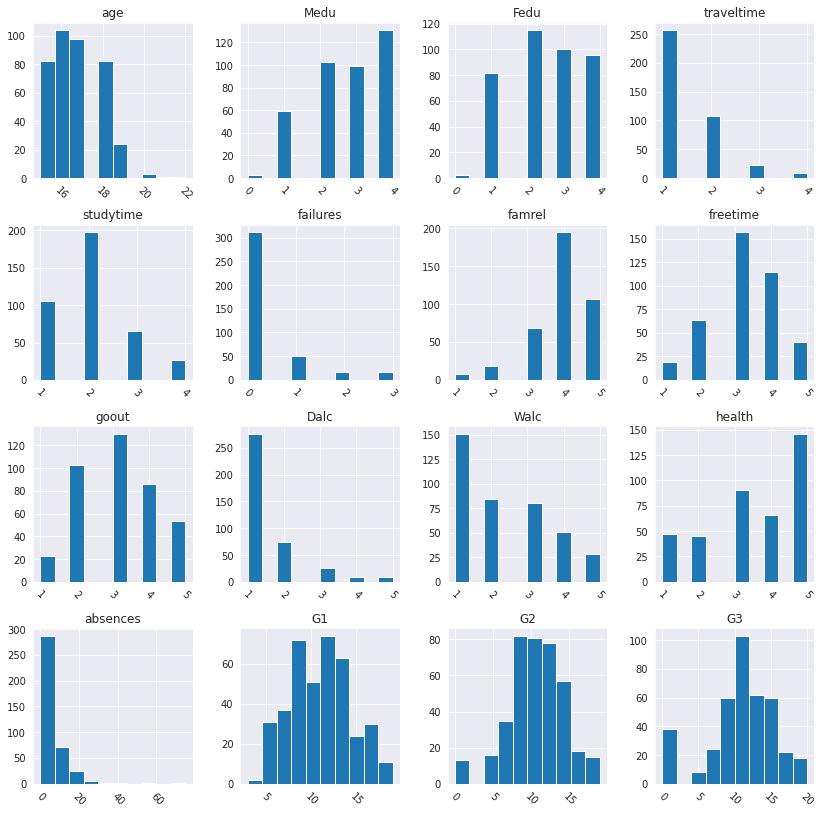

In [8]:
# this command creates a quick histogram of 16 different features
# from this we can appreciate the distributions of the data in order to better
# improve the later section of feature engineering

math_df.hist(figsize=(14,14), xrot=-45)
plt.show()

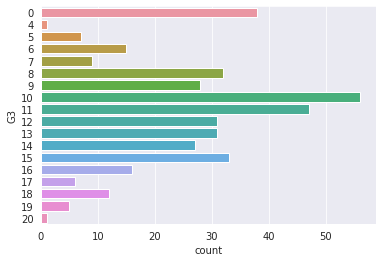

In [9]:
# this is a graph that shows the distribution of final grades (there are 3 periods, measured as G1, 
# G2, and G3) of the math course. Interesting how many students fully failed this course.

sns.countplot(y='G3', data=math_df)
plt.show()

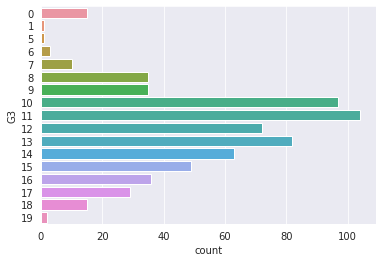

In [10]:
# far fewer people failed the Portuguese course which is why I am not focusing upon it

sns.countplot(y='G3', data=portuguese_df)
plt.show()

The thing that stands out from these two graphs of the distribution of final grades is that there are nearly 40 students who flunk math class, but the same cannot be said for Portuguese. For this reason, we are focusing on the math data set.

In [11]:
# this shows the average values of all variables when as differentiated by each of the 5 categorical 
# levels of the mother's education (as this variable ranges from 0 at the lowest to 4 at the highest)

math_df.groupby('Medu').mean()


,age,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Medu,,,,,,,,,,,,,,,
0,17.333333,1.666667,1.333333,2.000000,1.000000,3.333333,3.333333,2.333333,1.666667,2.666667,4.000000,0.666667,12.000000,12.666667,13.000000
1,17.101695,1.457627,1.711864,1.813559,0.677966,3.881356,3.135593,3.067797,1.525424,2.525424,3.559322,3.932203,9.745763,9.169492,8.677966
2,16.708738,2.029126,1.504854,2.087379,0.320388,4.000000,3.233010,3.009709,1.349515,2.135922,3.660194,4.873786,10.563107,10.359223,9.728155
3,16.777778,2.595960,1.393939,2.090909,0.434343,4.030303,3.272727,3.171717,1.575758,2.414141,3.555556,7.737374,10.606061,10.444444,10.303030
4,16.427481,3.351145,1.328244,2.053435,0.099237,3.877863,3.251908,3.175573,1.488550,2.206107,3.458015,5.748092,11.908397,11.847328,11.763359


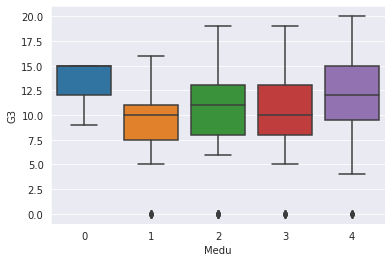

In [12]:
# this graph shows us the boxplot of final grades recieved by students based on their mother's level
# of education, with 0 being no education and 4 being college degree or higher

sns.boxplot(y='G3', x='Medu', data=math_df)

In [13]:
# this shows the average values of all variables when as differentiated by each of the 5 categorical 
# levels of the father's education (as this variable ranges from 0 at the lowest to 4 at the highest)

math_df.groupby('Fedu').mean()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Fedu,,,,,,,,,,,,,,,
0,15.500000,2.500000,2.000000,3.000000,0.000000,3.500000,3.500000,2.500000,1.000000,1.000000,2.000000,5.000000,12.000000,13.000000,13.000000
1,17.158537,1.731707,1.719512,1.951220,0.707317,3.963415,3.243902,3.109756,1.524390,2.378049,3.743902,5.048780,9.731707,9.390244,9.158537
2,16.643478,2.408696,1.400000,2.069565,0.347826,3.904348,3.278261,3.034783,1.521739,2.286957,3.478261,5.756522,11.026087,10.878261,10.260870
3,16.670000,3.130000,1.320000,2.120000,0.210000,4.030000,3.150000,3.120000,1.310000,2.260000,3.300000,6.440000,10.740000,10.750000,10.660000
4,16.416667,3.635417,1.395833,1.958333,0.135417,3.895833,3.260417,3.197917,1.583333,2.281250,3.781250,5.468750,11.927083,11.562500,11.364583


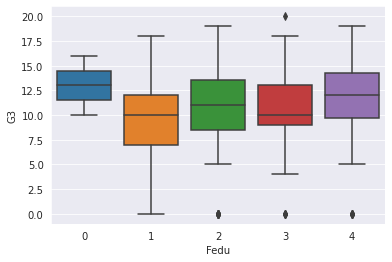

In [14]:
# this graph shows us the boxplot of final grades recieved by students based on their father's level
# of education, with 0 being no education and 4 being college degree or higher

sns.boxplot(y='G3', x='Fedu', data=math_df)

In [15]:
# this shows the average values of all variables when as differentiated by each of the 5 categorical 
# levels of the mother's job type (as this variable ranges from 0 at the lowest to 4 at the highest)

math_df.groupby('Mjob').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Mjob,,,,,,,,,,,,,,,,
at_home,16.966102,1.711864,2.118644,1.694915,2.101695,0.423729,3.881356,3.016949,3.000000,1.389831,2.338983,3.271186,4.694915,10.457627,9.677966,9.152542
health,16.352941,3.647059,2.941176,1.205882,2.000000,0.235294,3.764706,3.205882,3.323529,1.264706,2.382353,3.764706,4.558824,12.205882,12.352941,12.147059
other,16.751773,2.404255,2.234043,1.482270,2.028369,0.340426,3.971631,3.219858,3.106383,1.503546,2.248227,3.489362,6.170213,10.177305,10.177305,9.822695
services,16.679612,2.844660,2.572816,1.388350,2.029126,0.466019,4.029126,3.271845,3.135922,1.524272,2.281553,3.747573,6.019417,11.388350,11.213592,11.019417
teacher,16.517241,3.948276,3.293103,1.362069,2.017241,0.051724,3.896552,3.448276,3.051724,1.568966,2.310345,3.534483,5.741379,11.534483,11.224138,11.051724


In [16]:
# this shows the average values of all variables when as differentiated by each of the 5 categorical 
# levels of the father's job type (as this variable ranges from 0 at the lowest to 4 at the highest)

math_df.groupby('Fjob').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Fjob,,,,,,,,,,,,,,,,
at_home,17.150000,2.400000,2.350000,1.200000,2.150000,0.400000,3.750000,3.550000,2.900000,1.400000,1.600000,3.450000,4.650000,11.700000,10.600000,10.150000
health,16.055556,3.166667,3.333333,1.166667,2.500000,0.277778,3.888889,2.944444,3.000000,1.333333,1.888889,4.055556,5.555556,11.444444,11.388889,11.611111
other,16.705069,2.640553,2.271889,1.506912,2.004608,0.308756,3.958525,3.271889,3.156682,1.419355,2.350230,3.552995,5.829493,10.566820,10.410138,10.193548
services,16.783784,2.693694,2.558559,1.414414,2.045045,0.432432,4.018018,3.153153,3.090090,1.639640,2.477477,3.468468,5.873874,10.828829,10.882883,10.297297
teacher,16.379310,3.758621,3.862069,1.482759,1.862069,0.137931,3.724138,3.241379,3.034483,1.482759,1.862069,3.655172,5.000000,12.896552,12.000000,11.965517


In [17]:
# this shows the average values of all variables when as differentiated by each 
# of the 5 categorical levels of the student's free time 
# (as this variable ranges from 1 at the lowest to 5 at the highest)

math_df.groupby('freetime').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,goout,Dalc,Walc,health,absences,G1,G2,G3
freetime,,,,,,,,,,,,,,,
1,16.842105,2.526316,2.315789,1.473684,2.368421,0.368421,3.526316,2.315789,1.157895,1.842105,3.315789,10.947368,10.157895,10.421053,9.842105
2,16.734375,2.875000,2.609375,1.468750,2.062500,0.281250,3.734375,2.718750,1.281250,2.171875,3.437500,6.109375,12.046875,11.734375,11.562500
3,16.573248,2.656051,2.528662,1.439490,2.101911,0.261146,3.955414,3.031847,1.394904,2.191083,3.503185,4.808917,10.369427,10.280255,9.783439
4,16.800000,2.826087,2.539130,1.460870,2.000000,0.365217,4.078261,3.408696,1.626087,2.408696,3.686957,5.626087,10.834783,10.565217,10.426087
5,16.750000,2.800000,2.400000,1.400000,1.675000,0.600000,4.050000,3.550000,1.875000,2.750000,3.675000,6.350000,11.775000,11.350000,11.300000


In [18]:
# this shows the average values of all variables based on the number of absences each student has
# unlike other variables which have the values partitioned into ranges, this variable gives the raw absence number
# clearly this component of the data set will need to be cleaned to become less unruly

math_df.groupby('absences').mean()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,G1,G2,G3
absences,,,,,,,,,,,,,,,
0,16.608696,2.713043,2.608696,1.460870,2.034783,0.391304,4.095652,3.260870,2.921739,1.313043,1.965217,3.678261,10.547826,9.886957,8.443478
1,17.666667,2.333333,1.333333,1.333333,3.333333,0.000000,4.333333,3.000000,2.333333,1.333333,1.666667,3.666667,12.333333,12.666667,13.000000
2,16.153846,2.492308,2.369231,1.476923,2.030769,0.184615,3.846154,3.153846,2.923077,1.276923,2.076923,3.692308,11.630769,11.800000,11.907692
3,18.000000,2.125000,2.250000,1.500000,1.625000,0.500000,3.625000,3.625000,3.250000,2.250000,3.125000,3.250000,11.500000,11.500000,11.500000
4,16.716981,2.792453,2.566038,1.358491,2.132075,0.150943,4.018868,3.150943,3.339623,1.452830,2.415094,3.339623,10.830189,11.113208,11.283019
5,17.800000,2.400000,1.800000,1.200000,1.600000,0.600000,2.800000,3.200000,2.800000,1.800000,2.400000,3.400000,11.200000,11.000000,11.600000
6,16.096774,2.838710,2.516129,1.709677,2.193548,0.322581,3.967742,3.193548,3.580645,1.548387,2.548387,3.580645,10.838710,11.419355,11.774194
7,17.428571,3.000000,3.428571,1.428571,2.571429,0.142857,4.142857,3.714286,3.142857,1.428571,2.000000,3.428571,11.428571,11.285714,11.857143
8,16.500000,2.681818,2.363636,1.590909,1.909091,0.409091,4.000000,3.136364,2.954545,1.772727,2.363636,3.409091,10.863636,10.454545,10.590909


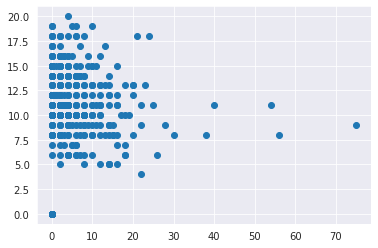

In [19]:
# this command creates a scatterplot for the coder to create a visual display 
# in order to examine the relationship between
# the number of absences and the final grade recieved by each student

# A = math_df('absences')
# B = math_df('G3')

# plt.plot(A, B)
# plt.show()

plt.scatter(math_df.absences, math_df.G3)
plt.show()

# it seems as though there is no striking pattern to the distribution of grades 
# and number of absences
# moreover, it appears as though everyone who recieved a failure (a 0) had 0 absences
# what we care about the most is why 50 people failed this class and 
# we won't find the answer here
# because of this, let's continue to explore the data

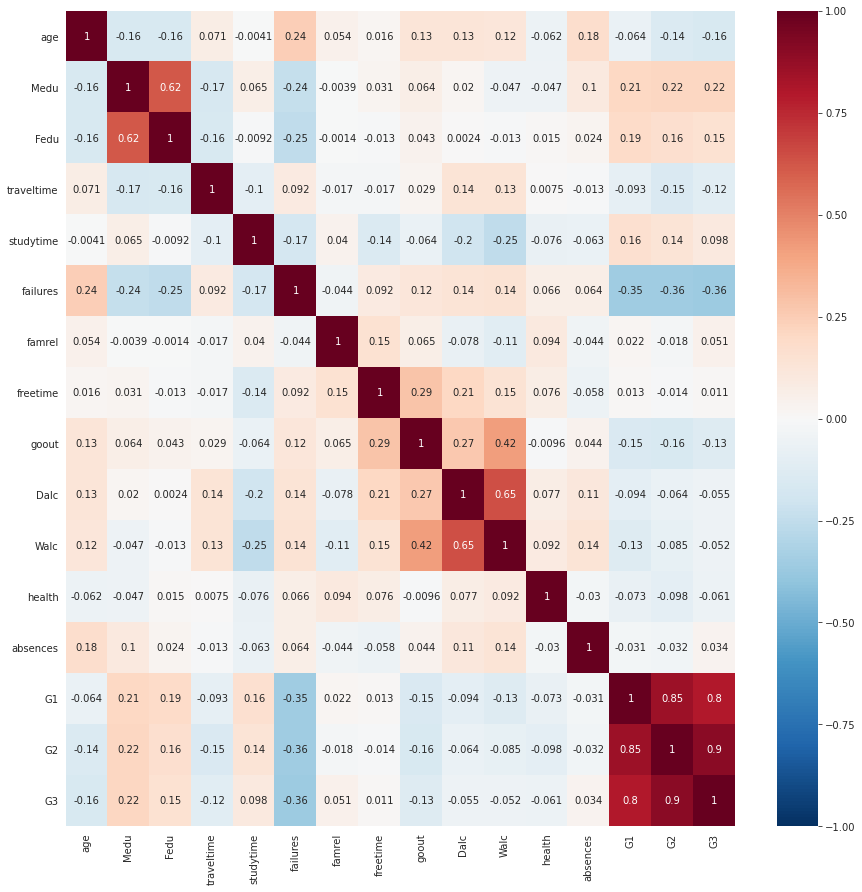

In [20]:
# this command creates a correlation map of various features with one another
# a correlation is a numerical value between 0 and 1 that shows how different 
# variables move relative to one another
# if the correlation is large and positive, then as X goes up Y also goes up nearly equally
# if the correlation is large and negative, then as X goes up Y goes down nearly equally
# if the correlation is small then the trend is less pronounced

correlations = math_df.corr()
corr = correlations

# increase the figsize to 10 x 9 so we can read it
plt.figure(figsize=(15,15))

# plot heatmap of correlations (aka add red for high correlations and blue for low correlations)
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

In [21]:
# create a boolean mask to split the graph so that it isn't mirrored along the diagonal
# values in the top triangle are 'True' values in the lower triangle are 'False'

mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

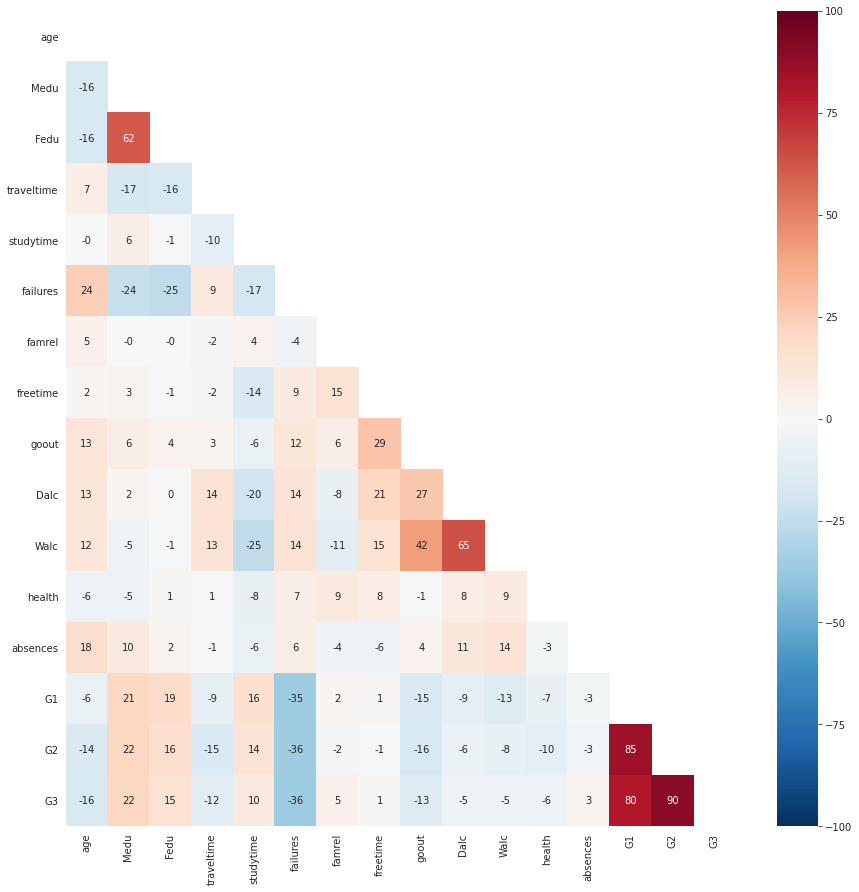

In [22]:
# increase the size so we can read it
plt.figure(figsize=(15,15))

# change color scheme to white to look slightly better
sns.set_style("white")

# plot heatmap of correlations with 0 to 100 values instead of 0 to 1 to make it easier to read
# this is achieved by multiplying the correlation coefficient by 100
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            vmin=-100,
            vmax=100,
            mask=mask)
plt.show()

# in this heat correlation map, the color red represents values closer to 100 
# which means these are a high correlation.
# the color blue represents negative values closer to -100 meaning perfectly
# negative correlation.

From this correlations heat map, we can conclude the following:


**POSITIVE CORRELATIONS (the red tiles):** 1) The strongest correlation are between the grades recieved in the first semester (G1), the second semester (G2) and the final grade (G3); 2) Weekly alcohol consumption (Walc) has a strong correlation with Daily alcohol consumption (0.65); 3) Mother's highest level of education (Medu) correlates with father's highest education (Fedu) at 0.62 meaning that parents with similar levels of education get married; 4) Amount of hours spent goiong out (goout) and weekly alcohol consumption (Walc) have a moderately strong positive correlation at 0.42. 5) Age and the number of failures have a positive correlation, suggesting that older students who were likely held back are more likely to fail (0.24); 6) Study time and grade recieved have a small positive correlation of 0.16, 0.14, and 0.1 for first semester, second semester, and final grade (respectively).

**NEGATIVE CORRELATIONS (the blue tiles):** 1) The positive correlations are much stronger than the negative correlations across the board, so these insights are less meaningful; 2) Having recieved a previous failing grade in class or many previous failure grades (failures) has the strongest negative correlation with final grade (G3) than any other negative correlation observed in this data set at -0.36; 3) There is a negative correlation of -0.24 and -0.25 between the number of failures and the highest level of education of both the student's mother and father (respectively) meaning that the failed grades are somewhat concentrated among students with parents who have lower levels of educational attainment; 4) Weekly and Daily alcohol consumption have a negative correlation with total study time at -0.25 and -0.20 respectively;

***SUMMARY: Due to the relatively small number of observations and the not particularly strong correlations (especially for negative values in blue), it is fair to conclude that the data are not that robust, and these findings are suggestive more than conclusive.***

In [23]:
# this shows us the raw correlations data without colorful accompaniment (significantly less fun)

math_df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famrel,0.053940,-0.003914,-0.001370,-0.016808,0.039731,-0.044337,1.000000,0.150701,0.064568,-0.077594,-0.113397,0.094056,-0.044354,0.022168,-0.018281,0.051363
freetime,0.016434,0.030891,-0.012846,-0.017025,-0.143198,0.091987,0.150701,1.000000,0.285019,0.209001,0.147822,0.075733,-0.058078,0.012613,-0.013777,0.011307
goout,0.126964,0.064094,0.043105,0.028540,-0.063904,0.124561,0.064568,0.285019,1.000000,0.266994,0.420386,-0.009577,0.044302,-0.149104,-0.162250,-0.132791
Dalc,0.131125,0.019834,0.002386,0.138325,-0.196019,0.136047,-0.077594,0.209001,0.266994,1.000000,0.647544,0.077180,0.111908,-0.094159,-0.064120,-0.054660


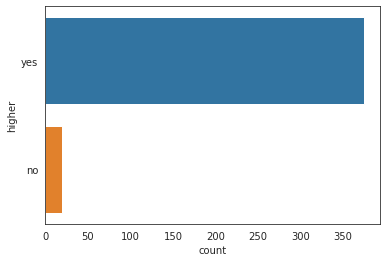

In [24]:
# this displays the count of students with ambitions for higher education
# also known as attending university

sns.countplot(y='higher', data=math_df)
plt.show()

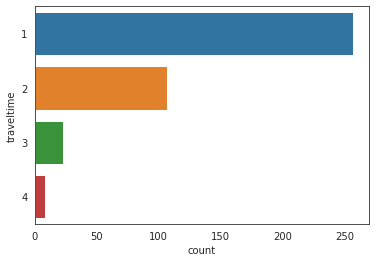

In [25]:
# this displays the total home to school travel time for each student
# (numeric: 1 - <15 min, 2 - 15 to 30 min, 3 - 30 min to 1 hour, or 4 - >1 hour)

sns.countplot(y='traveltime', data=math_df)
plt.show()

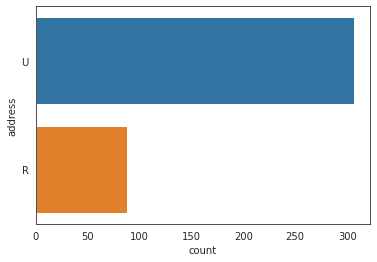

In [26]:
# this shows the urban / rural divide for each student
# (binary: ‘0’ - urban or ‘1’ - rural)

sns.countplot(y='address', data=math_df)
plt.show()

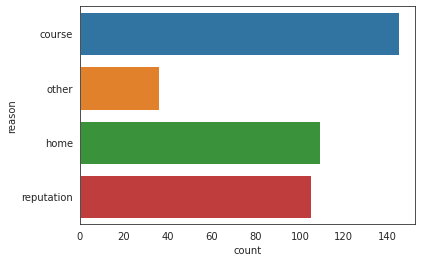

In [27]:
# this shows the stated reason for attending the school 
# which each student attends

sns.countplot(y='reason', data=math_df)
plt.show()

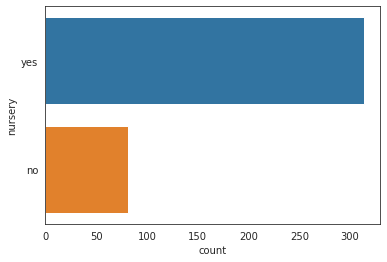

In [28]:
# this shows if the student attended nursery school (binary: yes or no)

sns.countplot(y='nursery', data=math_df)
plt.show()

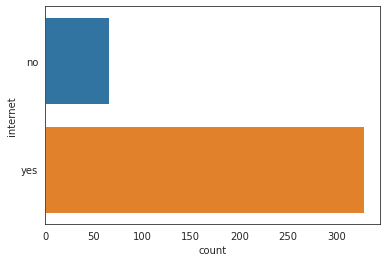

In [29]:
# this shows if the student has internet access at home

sns.countplot(y='internet', data=math_df)
plt.show()

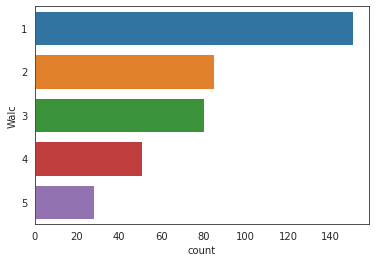

In [30]:
# this shows the weekly alcohol consumption among students
# (numeric: from 1 - very low to 5 - very high)

sns.countplot(y='Walc', data=math_df)
plt.show()

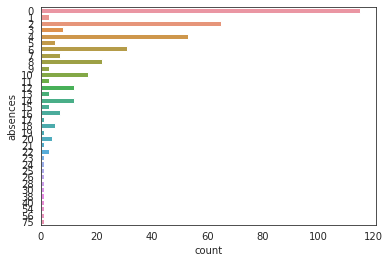

In [31]:
# this shows the number of absences for each student
# it ranges from 1 to 93

sns.countplot(y='absences', data=math_df)
plt.show()

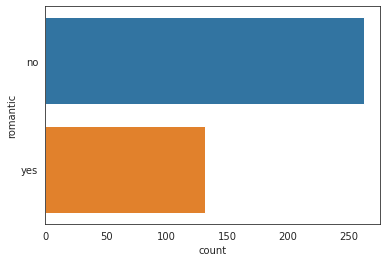

In [32]:
# this shows the romantic relationship status of students
# yes meaning that they have a partner and no meaning that they do not

sns.countplot(y='romantic', data=math_df)
plt.show()

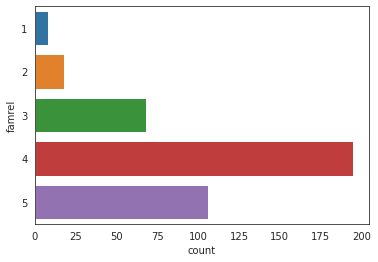

In [33]:
# this shows the quality of family relationships 
# (numeric: from 1 - very bad to 5 - excellent)

sns.countplot(y='famrel', data=math_df)
plt.show()

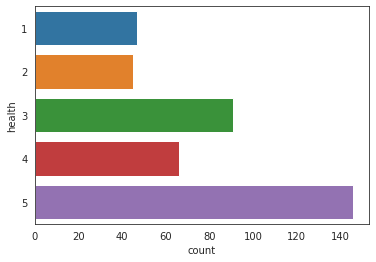

In [34]:
# current health status (numeric: from 1 - very bad to 5 - very good)

sns.countplot(y='health', data=math_df)
plt.show()

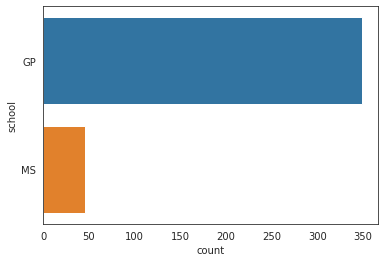

In [35]:
# this shows the student's school
# (binary: ‘GP’ - Gabriel Pereira or ‘MS’ - Mousinho da Silveira)

sns.countplot(y='school', data=math_df)
plt.show()

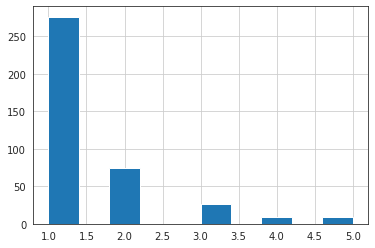

In [36]:
# this shows the daily alcohol consumption of the students
# (numeric: from 1 - very low to 5 - very high)

math_df.Dalc.hist()

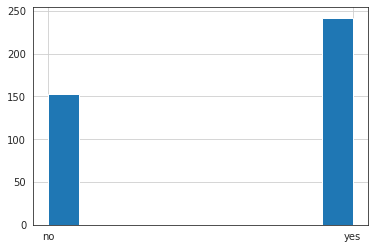

In [37]:
# this shows whether the student recieves family educational support

math_df.famsup.hist()

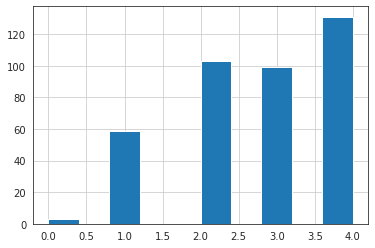

In [38]:
# this shows the mother's education
# mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 
# 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

math_df.Medu.hist()

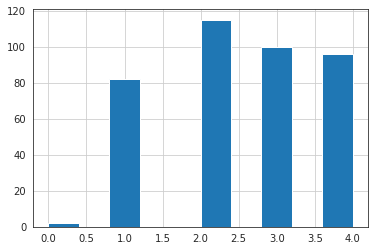

In [39]:
# this shows the mother's education
# mother’s education (numeric: 0 - none, 1 - primary education (4th grade), 
# 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

math_df.Fedu.hist()

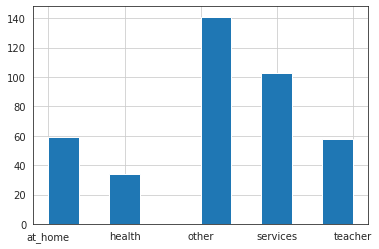

In [40]:
# this shows the mother's occupation

math_df.Mjob.hist()

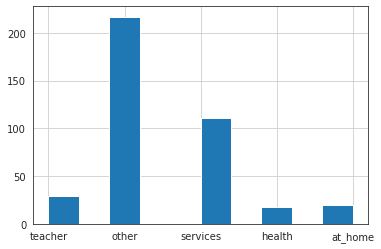

In [41]:
# this shows the father's occupation

math_df.Fjob.hist()

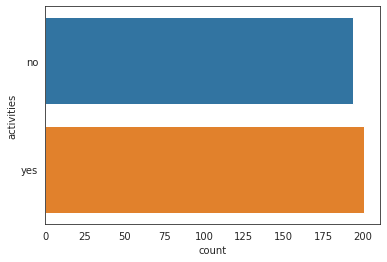

In [42]:
# this shows if the student participates in extra-curricular activities

sns.countplot(y='activities', data=math_df)
plt.show()

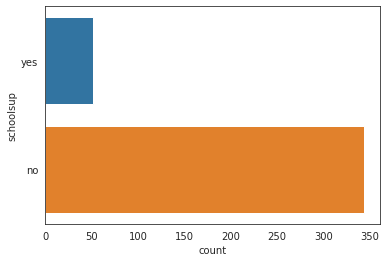

In [43]:
# this shows if the student recieves extra educational support

sns.countplot(y='schoolsup', data=math_df)
plt.show()

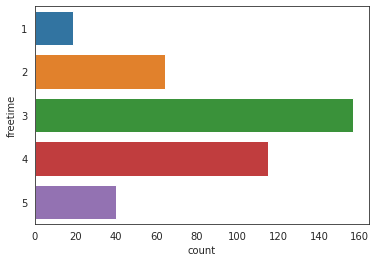

In [44]:
# this shows the amount of freetime the student has each week
# (numeric: from 1 - very low to 5 - very high)

sns.countplot(y='freetime', data=math_df)
plt.show()

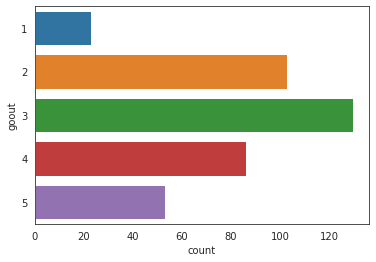

In [45]:
# this shows how often the student goes out with friends
# (numeric: from 1 - very low to 5 - very high)

sns.countplot(y='goout', data=math_df)
plt.show()

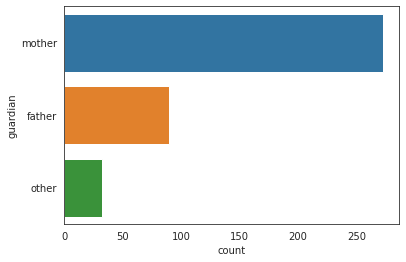

In [46]:
# this shows the student's primary guardian 
# (nominal: ‘mother’, ‘father’ or ‘other’) 

sns.countplot(y='guardian', data=math_df)
plt.show()

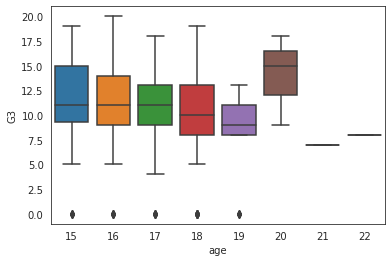

In [47]:
# this shows a box plot which shows the distribution of grades for each age
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade
# it appears as though either 19 year olds particularly struggle 
# or it is a difficult year of school. 

sns.boxplot(y='G3', x='age', data=math_df)

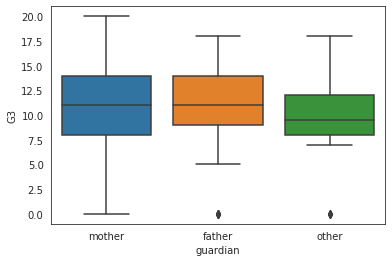

In [48]:
# this shows a box plot which shows the distribution of grades depending on guardians
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# the median score of those who have 'other' as their main guardian is noticably lower than "mom" or "dad"
# the bottom 25% of students with their mother as their guardian have a wide range of lower score, 
# but the top 25% have a range of high scores

sns.boxplot(y='G3', x='guardian', data=math_df)

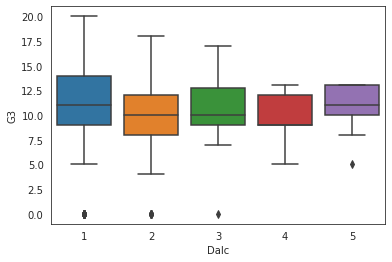

In [49]:
# this shows a box plot which shows the distribution of grades based on daily alcohol consumption
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# very oddly, it seems the people who consume the most alcohol during school 
# days get nearly the same grades as those who remain sober

sns.boxplot(y='G3', x='Dalc', data=math_df)

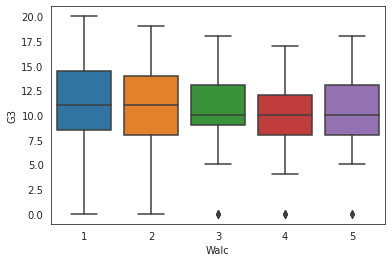

In [50]:
# this shows a box plot which shows the distribution of grades based on weekly alcohol consumption
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='Walc', data=math_df)

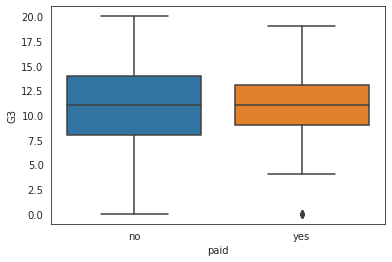

In [51]:
# this shows a box plot which shows the distribution of grades based on
# if the student takes additional paid classes
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='paid', data=math_df)

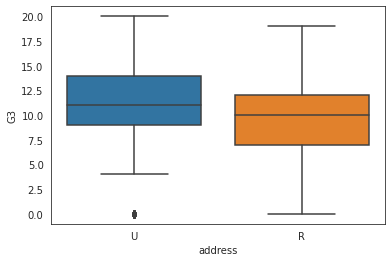

In [52]:
# this shows a box plot which shows the distribution of grades based on 
# the urban / rural status of the student
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='address', data=math_df)

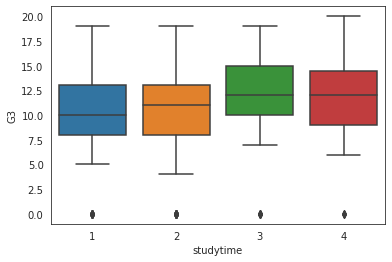

In [53]:
# this shows a box plot which shows the distribution of grades based on the
# amount of study time for each student (1 being very low, 5 being very high)
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='studytime', data=math_df)

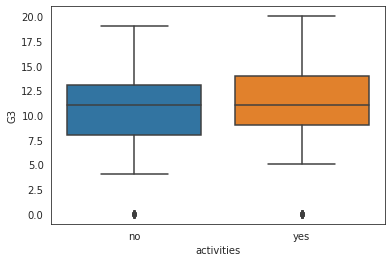

In [54]:
# this shows a box plot which shows the distribution of grades based on
# if the student does extracurricular activities
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='activities', data=math_df)

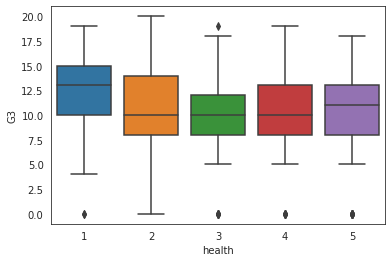

In [55]:
# this shows a box plot which shows the distribution of grades based on the
# health of the student (1 is very bad, 5 is very good)
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# oddly, people with 'very bad' health had the highest median outcome.

sns.boxplot(y='G3', x='health', data=math_df)

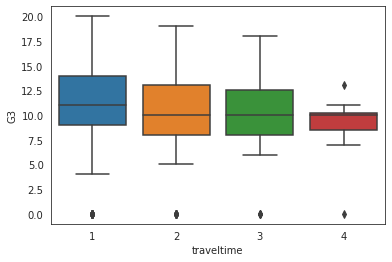

In [56]:
# this shows a box plot which shows the distribution of grades based on the
# length of travel time for each student (1 very low, 5 very high)
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='traveltime', data=math_df)

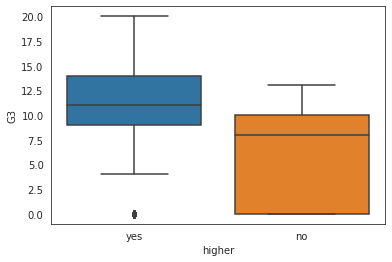

In [57]:
# this shows a box plot which shows the distribution of grades based on if the
# student endeavers to pursue higher education "university"
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# students who do not endeavor to go to higher education have profoundly worse outcomes

sns.boxplot(y='G3', x='higher', data=math_df)

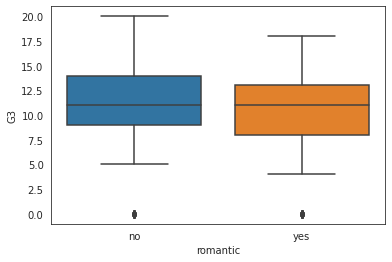

In [58]:
# this shows a box plot which shows the distribution of grades based on if the
# student is in a relationship
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# being in a relationship has essentially no educational reprecussion

sns.boxplot(y='G3', x='romantic', data=math_df)

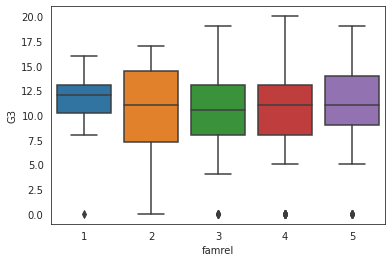

In [59]:
# this shows a box plot which shows the distribution of grades based on the 
# quality of family relationships
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# people with the family relationships described as being "very bad" 
# had the highest median outcomes

sns.boxplot(y='G3', x='famrel', data=math_df)

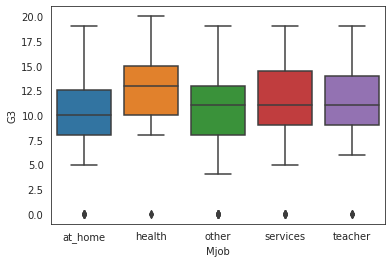

In [60]:
# this shows a box plot which shows the distribution of grades based on the 
# occupation of the student's mother
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='Mjob', data=math_df)

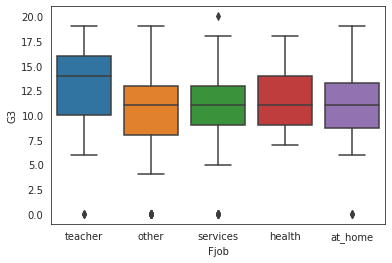

In [61]:
# this shows a box plot which shows the distribution of grades based on the 
# occupation of the student's father
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# when dads are teachers, the median academic outcome is considerably higher, odd

sns.boxplot(y='G3', x='Fjob', data=math_df)

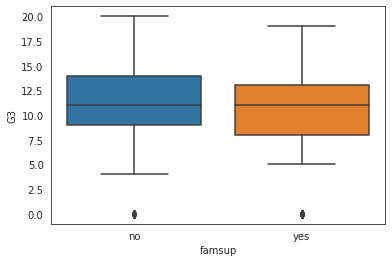

In [62]:
# this shows a box plot which shows the distribution of grades based whether
# or not the student has support from their family
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# having family support does not appear to particuarly matter

sns.boxplot(y='G3', x='famsup', data=math_df)

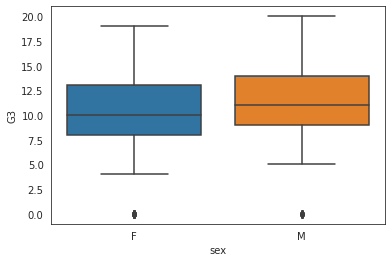

In [63]:
# # this shows a box plot which shows the distribution of grades based on the 
# gender of the student (note that non binary options were not listed
# on this questionare and should this survey be repeated they would be listed)
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# it appears that men recieve higher grades than women, I suspect this likely has to do w gender bias on part of the teachers

sns.boxplot(y='G3', x='sex', data=math_df)

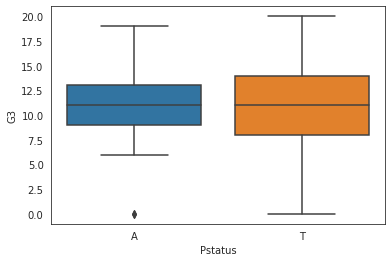

In [64]:
# this shows a box plot which shows the distribution of grades based on the 
# parental status of the student (living apart or together)
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# parental cohabitational status does not appear to matter much

sns.boxplot(y='G3', x='Pstatus', data=math_df)

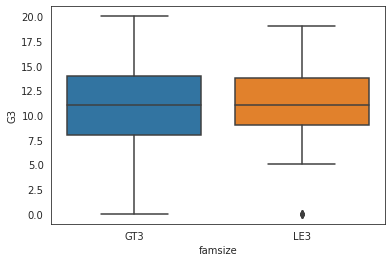

In [65]:
# this shows a box plot which shows the distribution of grades based on the 
# size of the family (greater than 3 or less than 3)
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='famsize', data=math_df)

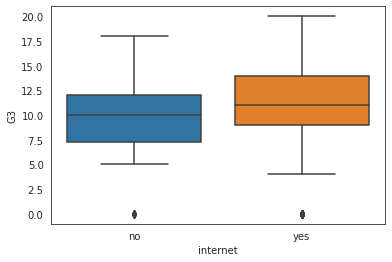

In [66]:
# this shows a box plot which shows the distribution of grades based on the 
# internet access status of the student (1 = yes, 0 = no)
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='internet', data=math_df)

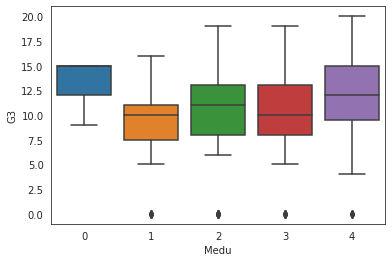

In [67]:
# this shows a box plot which shows the distribution of grades based on the 
# internet access status of the student (1 = yes, 0 = no)
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

sns.boxplot(y='G3', x='Medu', data=math_df)

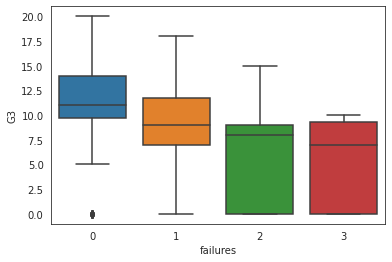

In [68]:
# this shows a box plot which shows the distribution of grades based on the 
# number of previous failing grades the student has received
# the bottom and top lines of each box represent the 25th and 75th percentile respectively
# the middle line represents the median student grade

# reciving a single failure does not have a devastating effect, however multiple 
# previous failed classes seldom result in positive outcomes
# clearly, this is a population that we need to examine more closely

sns.boxplot(y='G3', x='failures', data=math_df)

### Summary of Exploratory Analysis

From the many many graphs created in this section, we can tell that there are a number of unintuitive distributions and correlations within the data. 

**Surprises:** Most shockingly, the amount of alcohol consumed each day and each week has a very minimal effect on the final grade recieved by the student. Similarly, the quality of the relationship between the student and the family has weak relationship with student outcomes (with those with the worst relationships getting the best scores). Students whose fathers are teachers are more likely to get a higher grade in class than students whose mothers are teachers. Lastly, students who rated themselves as having the lowest health had slightly higher grades than any other health level.

**Expected:** There appears to be a strong correlation between the number of failures a student has received and their liklihood to get a low score (especially to fail) in math class. Students who spend more time studying get higher grades. Students who endeavor to go to university get higher grades. Students who live in an urban setting get better grades. Students who have wifi at home get better grades. Students whose parents have higher educational attainment get better grades. Lastly, if a student's guardian is neither their mother or their father they tend to get lower grades. 

**Conclusion:** The features are intuitive, some need to be put on the correct scale to be read by an algorithm. While there were a few surprising distributions, the overall trend is that there are only a few variables with strong swings in the grade outcome and there is a wide distribution for nearly all variables examined. None of the outliers suggest a cry for elimination from the dataset and all will be concluded in the proceeding analysis.

**Ideas for Feature Engineering:** Here is a list of variables I plan on creating from the existing variables as I believe that they will have predictive capacity beyond the existing features (also referred to as feature engineering). 
* hate_school: students with no aspiration for university and more than 10 absences
* serial_failure: same as hate school but with the added bonus of having more than one previous failed class on their transcript
* nerds: students with the highest reported study time and the lowest reported time spent "going out with friends"
* family_scholars: students who had both of their parents get the highest possible educational attainment
* parent_teacher: students who have both parents who work as teachers
* off_the_grid: students who are have both rural addresses and no internet access at home
* single_moms: students whose parental guardian is their mother
* single_dads: students whose parental guardian is their dad
* complicated_family: students whose parents live apart from one another and their guardian is neither their mom or dad
* dedicated_parents: students who both attended nursery school and take additional paid classes

## 4. Data Cleaning

In its existing form, not all of the data can be read by an algorithm so this is the part where it is cleaned to make it legible. 

In [69]:
# luckily for us, there are no duplicates in this data set

print (math_df.shape)
math_df = math_df.drop_duplicates()
print( math_df.shape )

(395, 33)
(395, 33)


In [70]:
# as an added bonus, there are no missing data points in this data set

math_df.select_dtypes(include=['object']).isnull().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Mjob          0
Fjob          0
reason        0
guardian      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
dtype: int64

In [71]:
# here we have the option to save the data frame before we begin to alter it
# for now, this is commented out with a hashtag but can be switched to active code in order to save
# prompt the save command in order to be extra safe when manipulating data

#math_df.to_csv('dirty_math_df.csv', index=None)

In [72]:
# the following code makes some dummy variables in math_df 
# this is recorded as 1 for yes and 0 for no so that an algorithm can read it
# the variables I am going to alter include: school, sex, address, famsize, pstatus, schoolsup,
# continued: famsup, paid, activities, nursery, higher, internet, romantic

# make 'school' a binary variable
math_df.school.replace('GP', '0', inplace=True)
math_df.school.replace('MS', '1', inplace=True)

# make 'sex' a binary variable
math_df.sex.replace('F', '0', inplace=True)
math_df.sex.replace('M', '1', inplace=True)

# make 'address' a binary variable
math_df.address.replace('U', '0', inplace=True)
math_df.address.replace('R', '1', inplace=True)

# make 'famsize' a binary variable
math_df.famsize.replace('LE3', '0', inplace=True)
math_df.famsize.replace('GT3', '1', inplace=True)

# make 'Pstatus' a binary variable
math_df.Pstatus.replace('T', '0', inplace=True)
math_df.Pstatus.replace('A', '1', inplace=True)

# make 'schoolsup' a binary variable
math_df.schoolsup.replace('no', '0', inplace=True)
math_df.schoolsup.replace('yes', '1', inplace=True)

# make 'famsup' a binary variable
math_df.famsup.replace('no', '0', inplace=True)
math_df.famsup.replace('yes', '1', inplace=True)

# make 'paid' a binary variable
math_df.paid.replace('no', '0', inplace=True)
math_df.paid.replace('yes', '1', inplace=True)

# make 'activities' a binary variable
math_df.activities.replace('no', '0', inplace=True)
math_df.activities.replace('yes', '1', inplace=True)

# make 'nursery' a binary variable
math_df.nursery.replace('no', '0', inplace=True)
math_df.nursery.replace('yes', '1', inplace=True)

# make 'higher' a binary variable
math_df.higher.replace('no', '0', inplace=True)
math_df.higher.replace('yes', '1', inplace=True)

# make 'internet' a binary variable
math_df.internet.replace('no', '0', inplace=True)
math_df.internet.replace('yes', '1', inplace=True)

# make 'romantic' a binary variable
math_df.romantic.replace('no', '0', inplace=True)
math_df.romantic.replace('yes', '1', inplace=True)

In [73]:
# this command is just to check if the previous code was successful
# it should return both a 0 and a 1 in place of a yes and a no

print( math_df.romantic.unique() )

['0' '1']


In [74]:
# so we got a 0 and 1, but they are not being saved as integers and instead being saved as objects

math_df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [75]:
# here we are making the objects into integers in order to move forward with the algorithms

math_df["school"] = math_df['school'].astype('int')
math_df["sex"] = math_df['sex'].astype('int')
math_df["address"] = math_df['address'].astype('int')
math_df["famsize"] = math_df['famsize'].astype('int')
math_df["Pstatus"] = math_df['Pstatus'].astype('int')
math_df["schoolsup"] = math_df['schoolsup'].astype('int')
math_df["famsup"] = math_df['famsup'].astype('int')
math_df["paid"] = math_df['paid'].astype('int')
math_df["activities"] = math_df['activities'].astype('int')
math_df["nursery"] = math_df['nursery'].astype('int')
math_df["higher"] = math_df['higher'].astype('int')
math_df["internet"] = math_df['internet'].astype('int')
math_df["romantic"] = math_df['romantic'].astype('int')
math_df.dtypes

school         int64
sex            int64
age            int64
address        int64
famsize        int64
Pstatus        int64
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup      int64
famsup         int64
paid           int64
activities     int64
nursery        int64
higher         int64
internet       int64
romantic       int64
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [76]:
# this code will turn the remaining four variables with each of their "object" explanatory reasons into a binary (dummy)
# variable. For example, the mother's job (Mjob) can be one of four options: at home, health care, services, teacher, or other.
# once these become dummy variables there will be a 1 to indicate the mother has this job or a 0 to indicate she does not

math_df = pd.get_dummies( math_df, columns=['Mjob', 'Fjob', 'reason', 'guardian'])

In [77]:
# this code shows us the first five observations so we can check to see if the 'get dummies' command actually works

math_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,0,18,0,1,1,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,0,1,0,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,0,0,0,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,0,1,0,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,0,1,0,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


## 5. Feature Engineering

### Some ideas for feature engineering from the exploratory data analysis:
1) Binary variable for if people drink any alcohol during the week days (about 100 do) and are truant (name this variable angst)
2) people who spend little time socializing and lots of time studying (name this variable nerds)
3) Variable for if both parents have the highest education score OR if one of the parents is a teacher (family_scholars)
4) Students who are both rural and do not have internet access (off_the_grid)
5) Students whose parents are apart and their guardian is listed as their mother (single_moms)
6) Students whose parents are apart and their guardian is listed as their father (single_dads)
7) Students whose parents are apart and their guardian is listed as other (complicated_family)
8) Students who both went to nursery and take paid additional classes (dedicated_parents) 

In [78]:
# this creates 8 new variables as well as checks the length of the code 
# to see if it did indeed work

print( len(math_df.columns))
math_df['hate_school'] = ((math_df.higher == 0) & (math_df.absences >= 11).astype(int))
math_df['serial_failure'] = ((math_df.higher == 0) & (math_df.absences >= 11) & (math_df.failures > 1).astype(int))
math_df['nerds'] = ((math_df.studytime == 4) & (math_df.goout == 1).astype(int))
math_df['family_scholars'] = (((math_df.Fedu == 4) & (math_df.Medu == 4)).astype(int))
math_df['parent_teacher'] = (((math_df.Mjob_teacher == 1) & (math_df.Fjob_teacher == 1)).astype(int))
math_df['off_the_grid'] = ((math_df.address == 1) & (math_df.internet == 0).astype(int))
math_df['single_moms'] = ((math_df.Pstatus == 1) & (math_df.guardian_mother == 1).astype(int))
math_df['single_dads'] = ((math_df.Pstatus == 1) & (math_df.guardian_father == 1).astype(int))
math_df['complicated_family'] = ((math_df.Pstatus == 1) & (math_df.guardian_other == 1).astype(int))
math_df['dedicated_parents'] = ((math_df.nursery == 1) & (math_df.paid == 1).astype(int))
print( len(math_df.columns))

46
56


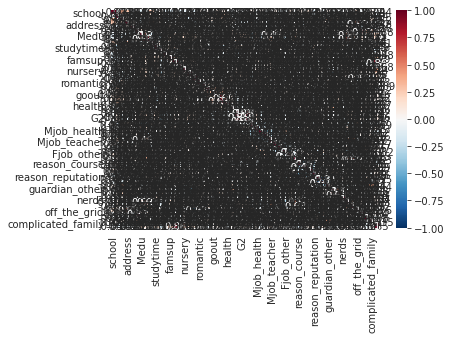

In [79]:
# this command creates a new correlations heat map to examine the impact of the new variables we have created

correlations = math_df.corr()
corr = correlations

# Plot heatmap of correlations (aka add red for high correlations and blue for low correlations)
sns.heatmap(corr,
            annot=True,
            cmap='RdBu_r',
            vmin=-1,
            vmax=1)
plt.show()

In [80]:
# create a boolean mask to split the graph so that it isn't mirrored along the diagonal
# values in the top triangle are 'True' values in the lower triangle are 'False'

mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

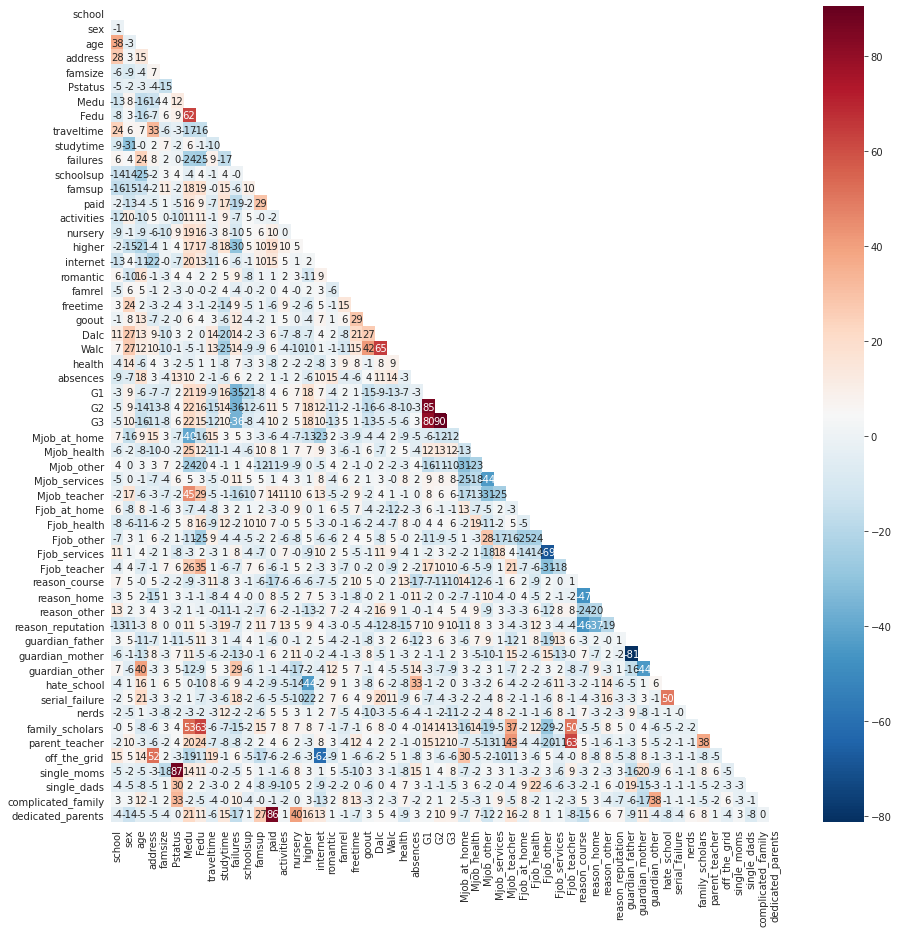

In [81]:
# Increae the size so we can read it
plt.figure(figsize=(15,15))

# Change color scheme to white to look slightly better
sns.set_style("white")

# Plot heatmap of correlations with 0 to 100 values
sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f',
            mask=mask)
plt.show()

### Analysis of the Correlations Heat Map

From this heat map we can conclude that unfortunately none of the feature engineered variables have a particularly high correlation with G1, G2, or G3. The only times we see high correlations (both positive or negative) is when the new feature is compared against a feature that comprises one of its constitutent parts. Of the variabels created, two are consistently have the highest correlation with the grades. These are family_scholars and the teacher_parent both of which are the only two that hover in the .10 to .15 correlation region, which is not particularly significant. 

Regardless of this outcome, now I will clean the data to make sure it is in a format which the machine learning algorithms can read. 

In [82]:
math_df.dtypes

school                int64
sex                   int64
age                   int64
address               int64
famsize               int64
Pstatus               int64
Medu                  int64
Fedu                  int64
traveltime            int64
studytime             int64
failures              int64
schoolsup             int64
famsup                int64
paid                  int64
activities            int64
nursery               int64
higher                int64
internet              int64
romantic              int64
famrel                int64
freetime              int64
goout                 int64
Dalc                  int64
Walc                  int64
health                int64
absences              int64
G1                    int64
G2                    int64
G3                    int64
Mjob_at_home          uint8
Mjob_health           uint8
Mjob_other            uint8
Mjob_services         uint8
Mjob_teacher          uint8
Fjob_at_home          uint8
Fjob_health         

In [83]:
math_df["hate_school"] = math_df['hate_school'].astype('int')
math_df["serial_failure"] = math_df['serial_failure'].astype('int')
math_df["nerds"] = math_df['nerds'].astype('int')
math_df["off_the_grid"] = math_df['off_the_grid'].astype('int')
math_df["single_moms"] = math_df['single_moms'].astype('int')
math_df["single_dads"] = math_df['single_dads'].astype('int')
math_df["complicated_family"] = math_df['complicated_family'].astype('int')
math_df["dedicated_parents"] = math_df['dedicated_parents'].astype('int')
math_df.dtypes

school                int64
sex                   int64
age                   int64
address               int64
famsize               int64
Pstatus               int64
Medu                  int64
Fedu                  int64
traveltime            int64
studytime             int64
failures              int64
schoolsup             int64
famsup                int64
paid                  int64
activities            int64
nursery               int64
higher                int64
internet              int64
romantic              int64
famrel                int64
freetime              int64
goout                 int64
Dalc                  int64
Walc                  int64
health                int64
absences              int64
G1                    int64
G2                    int64
G3                    int64
Mjob_at_home          uint8
Mjob_health           uint8
Mjob_other            uint8
Mjob_services         uint8
Mjob_teacher          uint8
Fjob_at_home          uint8
Fjob_health         

## 6. Algorithm Selection

**Algorithms:** 

For this section, I chose to use a total of five different algorithms designed for our chosen task of regression analysis. These include: 
* LASSO (Least Absolute Shrinkage and Selection Operator)
* RIDGE (no acronym)
* ElasticNet (combines the L1 penalty of lasso and the L2 penalty of ridge for the best of both worlds)
* Random Forest Regressor (maps decision trees)
* Gradient Boosting Regressor (maps decision trees)

**Hyperparameters:**
* The "penalty" hyperparameters tuning for lasso, ridge and enet can be found in the code below.
* The branches, features, and decision trees included in each random forest are tuned as hyperparameters and can be found in the code below. 

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


## 7. Model Training

In order to fully explore the data, I create three different models. More accurately, I use three different sets of variables to reach the target variable (the final grade also referred to as 'G3').

* **Model 1:** Grades from first semester (G1) and second semester (G2) in order to predict final grade (G3).
* **Model 2:** Socioeconomic and student activity survey response data in order to predict final grade (G3). This is all of the other features that are not G1, G2 or G3 as well as the variables created during the feature engineering section of this Jupyter Notebook.
* **Model 3:** All of the above (both grades and socioeconomic factors combined) to predict final grade (G3).

Correspondingly, the model training section will be split into three parts to focus on each of the three models.
* 7.1 for Model 1
* 7.2 for Model 2
* 7.3 for Model 3

## 7.1 Model Training for Model 1

In [85]:
# here we are setting 'G3' as the "target variable" also called the "dependent variable"
# meaning that all other variables will be the dependent variables which form the
# basis for the the analysis. Based on the the dependent variables the algorithm
# will conclude the predicted value of G3 (the final grade).

a = math_df.G3

# this sets the only remaining feature variables to be G1 and G2
# by dropping the other features.

B = math_df.drop(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 
                  'Fedu', 'traveltime', 
                  'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 
                  'activities', 'nursery', 'higher', 'internet', 'romantic', 
                  'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
                  'absences', 'G3', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
                  'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 
                  'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 
                  'reason_home', 'reason_other', 'reason_reputation', 
                  'guardian_father', 'guardian_mother', 'guardian_other', 
                  'hate_school', 'serial_failure', 'nerds', 'family_scholars', 
                  'parent_teacher', 'off_the_grid', 'single_moms', 'single_dads', 
                  'complicated_family', 'dedicated_parents'], axis=1)

In [86]:
# test_size=0.2 means that 20% of our data is set aside for the test set, 80% for training
# this code also sets a random state = 1234 so that if the code is ran again
# the numbers will be comparable to the initial run of this code

B_train, B_test, a_train, a_test = train_test_split(B, a,
                                                   test_size=0.2,
                                                   random_state=1234)

In [87]:
# this code will confirm we have the right number of observations in each subset
# we should have an equal number of rows and columns in both the B and a
# colloquially: it should list the same numbers twice

print( len(B_train), len(B_test), len(a_train), len(a_test) )

316 79 316 79


In [88]:
# this manually standardizes the data so that the means and standard deviations
# are on approximately the same scale (means centered around zero and SDs
# are not all 1.0 with unit variance)

B_train_new = (B_train - B_train.mean()) / B_train.std()

In [89]:
# this changes the pandas display format to show decimals

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [90]:
# this shows the summary statistics

B_train_new.describe()

,G1,G2
count,316.000,316.000
mean,-0.000,-0.000
std,1.000,1.000
min,-2.393,-2.814
25%,-0.892,-0.446
50%,0.010,0.081
75%,0.610,0.607
max,2.412,2.186


In [91]:
# this creates a pipeline dictionary
# this will standardize the training data, then create a regression model
# with penalty strength equal to the value for "alpha " (in this case 1)
# and a random seed = 123

make_pipeline(StandardScaler(), Lasso(random_state=123))

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
}

print(pipelines['lasso'] )
print(pipelines['ridge'] )
print(pipelines['enet'] )
print(pipelines['rf'] )
print(pipelines['gb'] )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=123,
                       solver='auto', tol=0.001))],
         verbose=False)
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elasticnet',
     

In [92]:
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=123,
       selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=123,
         selection='cyclic', tol=0.0001, warm_sta

In [93]:
# tuning hyperparameters (the strength of the penalty "alpha") for lasso and ridge

lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10]
}

ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10]
}

# for ElasticNet you add "L1" which is the ratio of L1 penalty to L2
# for ElasticNet, when L1 is equal to 1, it is Lasso Regression
# when L1 is equal to 0, it is Ridge Regression

enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [94]:
# this tunes the hyperparameters for the random forest regression and 
# the gradient boosting regressor
# n_estimators is the number of decision trees to include in the forest
# max_features is the number of features each tree is allowed to chose from
# max_depth is the max number of branches each tree can have

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33],
}

In [95]:
# this creates a dictionary for all of the hyperparameters

hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
}

In [96]:
# this sets up the cross-validation for a given algorithm

model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [97]:
# ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [98]:
# fit and tune the one model for Lasso manually
model.fit(B_train, a_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=123,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
         

In [99]:
# this for loop will state if the hyperparameters have been set up correctly
# or if something went wrong along the way

for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [100]:
# this creates a dictionary of all models that have been tuned using cross validation
# it fits and tunes all of the models in a single loop

fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    model.fit(B_train, a_train)
    
    fitted_models[name] = model
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [101]:
# this confirms that the 5 models are the correct type (GridSearchCV)

for key, value in fitted_models.items():
    print( key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [102]:
# this double checks that the models have been fitted correctly

from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(B_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [103]:
# this displays the cross-validated training performance of each model

for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.812813271436511
ridge 0.812723367008763
enet 0.8127818355114871
rf 0.7740218402203134
gb 0.7985908156327345


In [104]:
# this creates a cute little template to display the results of the algorithms
# using a for loop and the data dictionary created earlier
for name, model in fitted_models.items():
    pred = model.predict(B_test)
    print ( name )
    print ( '--------')
    print ( 'R^2:', r2_score(a_test, pred))
    print ( 'MAE:', mean_absolute_error(a_test, pred))
    print ( 'CV: ', model.best_score_ )
    print()

lasso
--------
R^2: 0.8353572291910736
MAE: 1.129983377896455
CV:  0.812813271436511

ridge
--------
R^2: 0.8353593855040372
MAE: 1.132972615215356
CV:  0.812723367008763

enet
--------
R^2: 0.8353503597838292
MAE: 1.1302005992642141
CV:  0.8127818355114871

rf
--------
R^2: 0.8333045497969628
MAE: 1.1959870835414883
CV:  0.7740218402203134

gb
--------
R^2: 0.8345576754165278
MAE: 1.1348675181558356
CV:  0.7985908156327345



### Model 1 Evaluation
Of all of the algorithms used, lasso is the best because it has the lowest mean absolute error (MAE) of 1.129. This is the mean distance between the actual value and the predicted value. Additionally, it has the highest cross validation score (CV) of 0.813. The R^2 is essentially equal across all algorithms at ~0.835. The R^2 value explains what percentage of the variance in the data set is explainable by the algorithm (higher is better). Let it be noted that ridge and ElasticNet are both effectively equal to the results of lasso and the results are within a rounding error of one another. 

Predicted vs. Actual Values [lasso] (Model 1)
This is a near 45 degree angle meaning very accurate


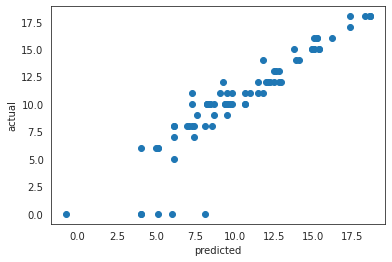

In [105]:
print ( 'Predicted vs. Actual Values [lasso] (Model 1)')
print ( 'This is a near 45 degree angle meaning very accurate')
lasso_pred = fitted_models['lasso'].predict(B_test)
plt.scatter(lasso_pred, a_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

# 7.2 Model Training for Model 2

In [106]:
# here we are setting 'G3' as the "target variable" also called the "dependent variable"
# meaning that all other variables will be the dependent variables which form the
# basis for the the analysis. Based on the the dependent variables the algorithm
# will conclude the predicted value of G3 (the final grade).

y = math_df.G3

# here we drop all of the grades from the first semester (G1), the second
# semester (G2) and the final grade meaning that only the socioeconomic
# and student survey factors will guide the algorithms to the final grade (G3).

X = math_df.drop(['G3', 'G2', 'G1'], axis=1)


In [107]:
# test_size=0.2 means that 20% of our data is set aside for the test set, 80% for training
# this code also sets a random state = 1234 so that if the code is ran again
# the numbers will be comparable to the initial run of this code

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

In [108]:
# this code will confirm we have the right number of observations in each subset
# we should have an equal number of rows and columns in both the X and y
# colloquially: it should list the same numbers twice

print( len(X_train), len(X_test), len(y_train), len(y_test) )

316 79 316 79


In [109]:
# this manually standardizes the data so that the means and standard deviations
# are on approximately the same scale (means centered around zero and SDs
# are not all 1.0 with unit variance)

X_train_new = (X_train - X_train.mean()) / X_train.std()

In [110]:
# this changes the pandas display format to show decimals

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [111]:
# this shows the summary statistics

X_train_new.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,hate_school,serial_failure,nerds,family_scholars,parent_teacher,off_the_grid,single_moms,single_dads,complicated_family,dedicated_parents
count,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,0.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000
mean,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,nan,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,nan,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.386,-0.967,-1.319,-0.552,-1.489,-0.335,-2.410,-2.369,-0.647,-1.208,-0.451,-0.369,-1.251,-0.931,-1.005,-1.925,-4.187,-2.199,-0.714,-3.468,-2.181,-1.858,-0.540,-0.997,-1.841,-0.691,-0.423,-0.329,-0.725,-0.596,-0.407,-0.231,-0.223,-1.084,-0.645,-0.266,-0.735,-0.640,-0.317,-0.601,-0.542,-1.467,-0.311,-0.098,nan,-0.056,-0.458,-0.150,-0.299,-0.280,-0.113,-0.127,-0.792
25%,-0.386,-0.967,-0.541,-0.552,-1.489,-0.335,-0.633,-0.504,-0.647,-1.208,-0.451,-0.369,-1.251,-0.931,-1.005,0.518,0.238,0.453,-0.714,0.030,-0.198,-0.959,-0.540,-0.997,-0.408,-0.691,-0.423,-0.329,-0.725,-0.596,-0.407,-0.231,-0.223,-1.084,-0.645,-0.266,-0.735,-0.640,-0.317,-0.601,-0.542,-1.467,-0.311,-0.098,nan,-0.056,-0.458,-0.150,-0.299,-0.280,-0.113,-0.127,-0.792
50%,-0.386,-0.967,0.236,-0.552,0.669,-0.335,0.256,0.428,-0.647,-0.019,-0.451,-0.369,0.797,-0.931,0.992,0.518,0.238,0.453,-0.714,0.030,-0.198,-0.060,-0.540,-0.199,0.308,-0.207,-0.423,-0.329,-0.725,-0.596,-0.407,-0.231,-0.223,0.919,-0.645,-0.266,-0.735,-0.640,-0.317,-0.601,-0.542,0.679,-0.311,-0.098,nan,-0.056,-0.458,-0.150,-0.299,-0.280,-0.113,-0.127,-0.792
75%,-0.386,1.031,1.014,-0.552,0.669,-0.335,1.145,0.428,0.773,-0.019,-0.451,-0.369,0.797,1.071,0.992,0.518,0.238,0.453,1.395,1.195,0.794,0.839,0.724,0.598,1.025,0.276,-0.423,-0.329,1.376,1.673,-0.407,-0.231,-0.223,0.919,1.546,-0.266,1.357,1.558,-0.317,1.659,-0.542,0.679,-0.311,-0.098,nan,-0.056,-0.458,-0.150,-0.299,-0.280,-0.113,-0.127,1.259
max,2.586,1.031,3.347,1.806,0.669,2.974,1.145,1.360,3.611,2.359,3.581,2.700,0.797,1.071,0.992,0.518,0.238,0.453,1.395,1.195,1.785,1.739,4.514,2.193,1.025,8.379,2.359,3.027,1.376,1.673,2.450,4.323,4.472,0.919,1.546,3.742,1.357,1.558,3.141,1.659,1.838,0.679,3.202,10.198,nan,17.720,2.175,6.633,3.334,3.564,8.818,7.874,1.259


In [112]:
# this creates a pipeline dictionary
# this will standardize the training data, then create a regression model
# with penalty strength equal to the value for "alpha " (in this case 1)
# and a random seed = 123

make_pipeline(StandardScaler(), Lasso(random_state=123))

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
}

print(pipelines['lasso'] )
print(pipelines['ridge'] )
print(pipelines['enet'] )
print(pipelines['rf'] )
print(pipelines['gb'] )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=123,
                       solver='auto', tol=0.001))],
         verbose=False)
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elasticnet',
     

In [113]:
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=123,
       selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=123,
         selection='cyclic', tol=0.0001, warm_sta

In [114]:
# tuning hyperparameters (the strength of the penalty "alpha") for lasso and ridge

lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10]
}

ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10]
}

# for ElasticNet you add "L1" which is the ratio of L1 penalty to L2
# for ElasticNet, when L1 is equal to 1, it is Lasso Regression
# when L1 is equal to 0, it is Ridge Regression

enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}


In [115]:
# this tunes the hyperparameters for the random forest regression and 
# the gradient boosting regressor
# n_estimators is the number of decision trees to include in the forest
# max_features is the number of features each tree is allowed to chose from
# max_depth is the max number of branches each tree can have

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33],
}

In [116]:
# this creates a dictionary for all of the hyperparameters

hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
}

In [117]:
# this sets up the cross-validation for a given algorithm

model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [118]:
# ignore ConvergenceWarning messages
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [119]:
# fit and tune the one model for Lasso manually
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=123,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
         

In [120]:
# this for loop will state if the hyperparameters have been set up correctly
# or if something went wrong along the way

for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [121]:
# this creates a dictionary of all models that have been tuned using cross validation
# it fits and tunes all of the models in a single loop

fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    model.fit(X_train, y_train)
    
    fitted_models[name] = model
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [122]:
# this confirms that the 5 models are the correct type (GridSearchCV)

for key, value in fitted_models.items():
    print( key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [123]:
# this double checks that the models have been fitted correctly

from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [124]:
# this displays the cross-validated training performance of each model

for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.026340701444119097
ridge -0.055317095300933136
enet 0.04691181451533157
rf 0.2086331582753426
gb 0.18130790862455665


In [125]:
# this creates a cute little template to display the results of the algorithms
# using a for loop and the data dictionary created earlier
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print ( name )
    print ( '--------')
    print ( 'R^2:', r2_score(y_test, pred))
    print ( 'MAE:', mean_absolute_error(y_test, pred))
    print ( 'CV: ', model.best_score_ )
    print()

lasso
--------
R^2: 0.10739083400416871
MAE: 3.1479216653808013
CV:  0.026340701444119097

ridge
--------
R^2: 0.042033867862025565
MAE: 3.379528086091887
CV:  -0.055317095300933136

enet
--------
R^2: 0.09061185050490328
MAE: 3.1813568938187955
CV:  0.04691181451533157

rf
--------
R^2: 0.28894774139798374
MAE: 2.6734177215189874
CV:  0.2086331582753426

gb
--------
R^2: 0.1884242173643097
MAE: 3.033933436899372
CV:  0.18130790862455665



### Model 2 Evaluation
Of all of the algorithms used, random forest (rf) is the best because it has the lowest mean absolute error (MAE) of 2.673. This is the mean distance between the actual value and the predicted value.  Additionally, it has the highest cross validation score (CV) of 0.209. The R^2 for random forest is also the highest at 0.289. The R^2 value explains what percentage of the variance in the data set is explainable by the algorithm (higher is better). The random forest does considerably better than all other alternatives with only the gradient boosted coming close.

Predicted vs. Actual Results [rf] (Model 2)
No 45 degree angle, low accuracy models


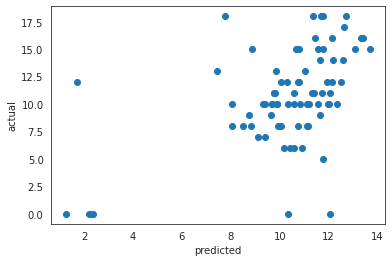

In [126]:
print ( 'Predicted vs. Actual Results [rf] (Model 2)')
print ( 'No 45 degree angle, low accuracy models')
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## Saving the Best Model (optional)

In [127]:
# what class was the winning model?
type(fitted_models['rf'])

# confirm access of winning model
type(fitted_models['rf'].best_estimator_)

#what hyperparameter values did the winning model have?
# look for the n_estimators and max_features
fitted_models['rf'].best_estimator_

# save model:
# import pickle
# with open('final_model.pkl', 'wb') as f:
#   pickle.dump(fitted_models['rf'].best_estimator_, f)
# print ( 'Mission Accomplished: Winning model successfully pickled' )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=100, n_jobs=None,
                                       oob_score=False, random_state=123,
                                       verbose=0, warm_start=False))],
         verbose=False)

# 7.3 Model Training for Model 3

In [128]:
# here we are setting 'G3' as the "target variable" also called the "dependent variable"
# meaning that all other variables will be the dependent variables which form the
# basis for the the analysis. Based on the the dependent variables the algorithm
# will conclude the predicted value of G3 (the final grade).

c = math_df.G3

# here we are only dropping G3, meaning that the algorithm will have both the 
# grading data from the first semester (G1) and the second semester (G2) and
# the socioeconomic data as well as the student survey data to predict the
# final grade of G3

D = math_df.drop(['G3'], axis=1)

In [129]:
# test_size=0.2 means that 20% of our data is set aside for the test set, 80% for training
# this code also sets a random state = 1234 so that if the code is ran again
# the numbers will be comparable to the initial run of this code

D_train, D_test, c_train, c_test = train_test_split(D, c,
                                                   test_size=0.2,
                                                   random_state=1234)

In [130]:
# this code will confirm we have the right number of observations in each subset
# we should have an equal number of rows and columns in both the D and c
# colloquially: it should list the same numbers twice

print( len(D_train), len(D_test), len(c_train), len(c_test) )

316 79 316 79


In [131]:
# this manually standardizes the data so that the means and standard deviations
# are on approximately the same scale (means centered around zero and SDs
# are not all 1.0 with unit variance)

D_train_new = (D_train - D_train.mean()) / D_train.std()

In [132]:
# this changes the pandas display format to show decimals

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [133]:
# this shows the summary statistics

D_train_new.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,hate_school,serial_failure,nerds,family_scholars,parent_teacher,off_the_grid,single_moms,single_dads,complicated_family,dedicated_parents
count,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,0.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000,316.000
mean,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,nan,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,nan,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.386,-0.967,-1.319,-0.552,-1.489,-0.335,-2.410,-2.369,-0.647,-1.208,-0.451,-0.369,-1.251,-0.931,-1.005,-1.925,-4.187,-2.199,-0.714,-3.468,-2.181,-1.858,-0.540,-0.997,-1.841,-0.691,-2.393,-2.814,-0.423,-0.329,-0.725,-0.596,-0.407,-0.231,-0.223,-1.084,-0.645,-0.266,-0.735,-0.640,-0.317,-0.601,-0.542,-1.467,-0.311,-0.098,nan,-0.056,-0.458,-0.150,-0.299,-0.280,-0.113,-0.127,-0.792
25%,-0.386,-0.967,-0.541,-0.552,-1.489,-0.335,-0.633,-0.504,-0.647,-1.208,-0.451,-0.369,-1.251,-0.931,-1.005,0.518,0.238,0.453,-0.714,0.030,-0.198,-0.959,-0.540,-0.997,-0.408,-0.691,-0.892,-0.446,-0.423,-0.329,-0.725,-0.596,-0.407,-0.231,-0.223,-1.084,-0.645,-0.266,-0.735,-0.640,-0.317,-0.601,-0.542,-1.467,-0.311,-0.098,nan,-0.056,-0.458,-0.150,-0.299,-0.280,-0.113,-0.127,-0.792
50%,-0.386,-0.967,0.236,-0.552,0.669,-0.335,0.256,0.428,-0.647,-0.019,-0.451,-0.369,0.797,-0.931,0.992,0.518,0.238,0.453,-0.714,0.030,-0.198,-0.060,-0.540,-0.199,0.308,-0.207,0.010,0.081,-0.423,-0.329,-0.725,-0.596,-0.407,-0.231,-0.223,0.919,-0.645,-0.266,-0.735,-0.640,-0.317,-0.601,-0.542,0.679,-0.311,-0.098,nan,-0.056,-0.458,-0.150,-0.299,-0.280,-0.113,-0.127,-0.792
75%,-0.386,1.031,1.014,-0.552,0.669,-0.335,1.145,0.428,0.773,-0.019,-0.451,-0.369,0.797,1.071,0.992,0.518,0.238,0.453,1.395,1.195,0.794,0.839,0.724,0.598,1.025,0.276,0.610,0.607,-0.423,-0.329,1.376,1.673,-0.407,-0.231,-0.223,0.919,1.546,-0.266,1.357,1.558,-0.317,1.659,-0.542,0.679,-0.311,-0.098,nan,-0.056,-0.458,-0.150,-0.299,-0.280,-0.113,-0.127,1.259
max,2.586,1.031,3.347,1.806,0.669,2.974,1.145,1.360,3.611,2.359,3.581,2.700,0.797,1.071,0.992,0.518,0.238,0.453,1.395,1.195,1.785,1.739,4.514,2.193,1.025,8.379,2.412,2.186,2.359,3.027,1.376,1.673,2.450,4.323,4.472,0.919,1.546,3.742,1.357,1.558,3.141,1.659,1.838,0.679,3.202,10.198,nan,17.720,2.175,6.633,3.334,3.564,8.818,7.874,1.259


In [134]:
# this creates a pipeline dictionary
# this will standardize the training data, then create a regression model
# with penalty strength equal to the value for "alpha " (in this case 1)
# and a random seed = 123

make_pipeline(StandardScaler(), Lasso(random_state=123))

pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123)),
}

print(pipelines['lasso'] )
print(pipelines['ridge'] )
print(pipelines['enet'] )
print(pipelines['rf'] )
print(pipelines['gb'] )

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('ridge',
                 Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=False, random_state=123,
                       solver='auto', tol=0.001))],
         verbose=False)
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('elasticnet',
     

In [135]:
pipelines['lasso'].get_params()

{'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=123,
       selection='cyclic', tol=0.0001, warm_start=False),
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False,
 'memory': None,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
         normalize=False, positive=False, precompute=False, random_state=123,
         selection='cyclic', tol=0.0001, warm_sta

In [136]:
# tuning hyperparameters (the strength of the penalty "alpha") for lasso and ridge

lasso_hyperparameters = {
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10]
}

ridge_hyperparameters = {
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10]
}

# for ElasticNet you add "L1" which is the ratio of L1 penalty to L2
# for ElasticNet, when L1 is equal to 1, it is Lasso Regression
# when L1 is equal to 0, it is Ridge Regression

enet_hyperparameters = {
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [137]:
# this tunes the hyperparameters for the random forest regression and 
# the gradient boosting regressor
# n_estimators is the number of decision trees to include in the forest
# max_features is the number of features each tree is allowed to chose from
# max_depth is the max number of branches each tree can have

gb_hyperparameters = {
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

rf_hyperparameters = {
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33],
}

In [138]:
# this creates a dictionary for all of the hyperparameters

hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters,
}

In [139]:
# this sets up the cross-validation for a given algorithm

model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [140]:
# ignore convergence warning messages that may pop up
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [141]:
# fit and tune the one model for lasso manually
model.fit(D_train, c_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardscaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lasso',
                                        Lasso(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False,
                                              random_state=123,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
         

In [142]:
# this for loop will state if the hyperparameters have been set up correctly
# or if something went wrong along the way

for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print( key, 'was found in hyperparameters, and it is a grid.' )
        else:
            print( key, 'was found in hyperparameters, but it is not a grid.' )
    else:
        print( key, 'was not found in hyperparameters')

enet was found in hyperparameters, and it is a grid.
gb was found in hyperparameters, and it is a grid.
ridge was found in hyperparameters, and it is a grid.
rf was found in hyperparameters, and it is a grid.
lasso was found in hyperparameters, and it is a grid.


In [143]:
# this creates a dictionary of all models that have been tuned using cross validation
# it fits and tunes all of the models in a single loop

fitted_models = {}

for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    model.fit(D_train, c_train)
    
    fitted_models[name] = model
    
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [144]:
# this confirms that the 5 models are the correct type (GridSearchCV)

for key, value in fitted_models.items():
    print( key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [145]:
# this displays the cross-validated training performance of each model

for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.8023938161310401
ridge 0.771829781360475
enet 0.7969180638713553
rf 0.8469653199317875
gb 0.8553912418817887


In [146]:
# this creates a cute little template to display the results of the algorithms
# using a for loop and the data dictionary created earlier
for name, model in fitted_models.items():
    pred = model.predict(D_test)
    print ( name )
    print ( '--------')
    print ( 'R^2:', r2_score(c_test, pred))
    print ( 'MAE:', mean_absolute_error(c_test, pred))
    print ( 'CV: ', model.best_score_ )
    print()

lasso
--------
R^2: 0.8218884880594104
MAE: 1.1173943731643001
CV:  0.8023938161310401

ridge
--------
R^2: 0.8159506390492465
MAE: 1.2831107891197215
CV:  0.771829781360475

enet
--------
R^2: 0.8186788494852617
MAE: 1.1526725934878468
CV:  0.7969180638713553

rf
--------
R^2: 0.8951774056485878
MAE: 0.8840506329113921
CV:  0.8469653199317875

gb
--------
R^2: 0.8930573175381897
MAE: 0.8512803445663141
CV:  0.8553912418817887



### Model 3 Evaluation
Of all of the algorithms used, gradient boosting regressor (gb) is the best because it has the lowest mean absolute error (MAE) of 0.851. This is the mean distance between the actual value and the predicted value.  Additionally, it has the highest cross validation score (CV) of 0.855. The R^2 for random forest is also the nearly the highest at 0.893 a rounding error from the highest of 0.895 from the random forest algorithm. The R^2 value explains what percentage of the variance in the data set is explainable by the algorithm (higher is better). The gradient boosted regressor does considerably better than all other alternatives except for the random forest which came close.

Predicted vs. Actual Results [gb] (Model 3)
Near 45 degree angle, high accuracy model


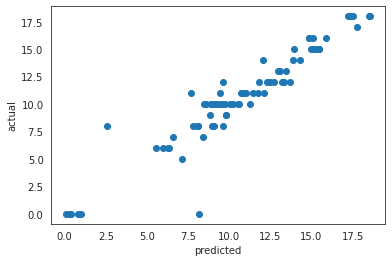

In [147]:
print ( 'Predicted vs. Actual Results [gb] (Model 3)')
print ( 'Near 45 degree angle, high accuracy model')
gb_pred = fitted_models['gb'].predict(D_test)
plt.scatter(gb_pred, c_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

## 8. Insights and Conclusion
My hypothesis: there are factors that are highly predictive of students' final grades in mathematics class. I hypothesize that non-interim-grade factors will be the most predictive of school success. Non-interim-grade factors include things such as: socioeconomic factors, parent background, school activities, and other related daily life experiences.

For this project, I completed the following:

1.   First, I used machine learning algorithms to predict the final grade (G3) of students in their math class. In the first model I created **(Model 1),** I only used two variables to reach this outcome. These two variables were the grades for first semester (G1) and second semester (G2) which I determined had the highest correlation with the final grade using a correlation heat map during the data exploration phase. This model had a high level of prediction accuracy as measured by three metrics: mean absolute error, cross validation, and R^2. 
* Of the algorithms tested using the limited features of G1 and G2, the *lasso* algorithm performed the best because it has the lowest mean absolute error **(MAE) of 1.129.** This is the mean distance between the actual value and the predicted value. Additionally, it has the highest cross validation score **(CV) of 0.813,** and an **R^2 value of 0.835.** The R^2 value tells us what percentage of the variance in the data set is explainable by the algorithm (higher is better).

* While this sounds good, I wanted to do some additional work on the project as those two features (G1 and G2) are direct inputs into the final grade (G3) and don't include any non-interim-grade factors which are more interesting when considering applying the results of this study to a policy solution intended to reduce the prevalence of low grades within this student population. 

2.   Next, I created a second model **(Model 2)** that exclusively used the features related to non-interim-grade factors and student survey response data. These factors are related to the schooling but not directly captured by the scores in the class. For example, these features include: highest education of the parents, internet access, university ambitions of the student, travel time to school, and 49 others (see "Introduction" and "Feature Engineering" sections above for the full list of features). In addition to the 26 non-interim-grade variables included from the public data repository from which I took this data set, I also feature engineered 10 new variables and cleaned the existing data to make it so that an algorithm could read it which created 17 new variables bringing the total to 53 variables used in computing Model 2.

* By examining these 53 non-interim-grade feature variables, I discovered that while these features on the face of it could have uncovered hidden correlations, their predictive capacity to estimate final grades were limited at best. The best algorithm tested is the *'random forest'* with a **MAE of 2.67, a CV of 0.208, and an R^2 of 0.288.** Within this data set, the non-interim-grade variables had limited explanatory power on the final grade (G3).


3.  Lastly, I created a third model **(Model 3)** which combined the first and second approaches together. Meaning, the final model predicted the students final grades using both interim semester grades, and non-interim-grade factors. When using all available features, the combined input variables resulted in the highest predictive capacity. This was achieved using the *'gradient boosting regressor'* algorithm which preformed the best with an **MAE of 0.851, a CV of 0.855, and an R^2 of 0.893.** 

* **In conclusion,** there are factors that have a high predictive capacity for the students final grade in math class which are the interim grades they received in class. Surpringly, of the variables tested, the non-interim-grade factors had the lowest predictive capacity as determined by the lackluster results of Model 1 (interim grade data) relative to Model 2 (non-interim-grade factor data). Clearly there are additonal hidden variables which influence the outcome and more studies need to be conducted in order to fully appreciate these linkages. 

5. As a **next step**, this project could explore several additional areas. 
* Get more data on student performance scores over more time periods and for more students (this data set included fewer than 400 students).
* Get more non-interim-grade factors directly from census data rather than survey data which can often be inaccurate due to dishonest self reporting.
* Expand the scope of the data pool to include many more schools instead of only two schools. These new schools should be diverse in terms of geography, class status, public/private ownership, and ethnic composition. 